# Digit Recognizer

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch, torchvision
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor

In [125]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample = pd.read_csv('dataset/sample_submission.csv')

In [126]:
train_numpy = train.to_numpy()

# the image var is for understanding purpose only
image = train_numpy[3, 1:] # 3rd row, was 4 in the csv

(28, 28) <class 'tuple'>


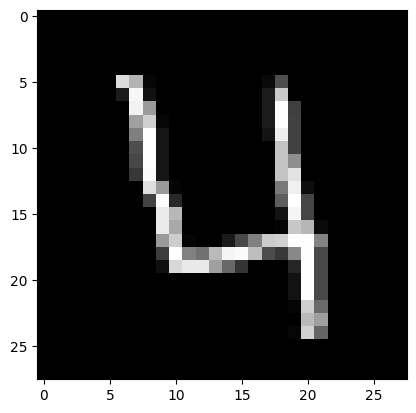

In [127]:
reshaped_image = image.reshape(28, 28)
plt.imshow(reshaped_image, cmap='gray')

print(reshaped_image.shape, type(reshaped_image.shape))

### Let's plan

For the neural network, let's do it as:
784 -> 128 -> 64 -> 10

784 are the pixels of the image, 128 and 64 are the number of neurons in the hidden layers and 10 is the number of classes. 

We will use the ReLU activation function for the hidden layers and the softmax activation function for the output layer.

i.e., ReLU for 128 and 64 neurons and softmax for 10 neurons.

ReLU formula is:

$relu(x) = max(0, x)$

Softmax formula is:

$softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

But how will we verify the prediction with the real MNIST dataset? We will use the cross-entropy loss function. And? We will use the gradient descent optimizer to minimize the loss function. How will we show the output of the model? We will use the accuracy metric. 

Format of the result should be like this:

```
ImageId,Label
1,0
2,0
3,0
etc.
```

In [128]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X_train = train_numpy[:, 1:] # all rows, all columns except the first
Y_train = train_numpy[:, 0] # all rows, only the first column called "label"

print(f"X_train\'s shape: {X_train.shape}\nY_train\'s shape: {Y_train.shape}")

X_train's shape: (42000, 784)
Y_train's shape: (42000,)


This basically means X_train has 42000 rows and 784 columns (pixel0 to pixel783). And Y_train has 42000 elements. When the shape is written as (42000,), the absence of a second dimension after the comma means it’s just a single vector (a 1D array), not a 2D array like X_train.

In [130]:
X_train = X_train / 255.0

---

## Creating a neural network

### Logic

#### 1. Input Layer:

784 nodes: This remains the same, as each input image is still flattened into 784 pixels (28x28).

#### 2. Hidden Layers:

- First hidden layer: 128 nodes (units).

Apply a non-linear activation function like ReLU to introduce non-linearity, allowing the model to learn complex patterns.

- Second hidden layer: 64 nodes (units).

Again, apply ReLU for non-linearity.

#### 3. Output Layer:

10 nodes: This remains the same, since I'm classifying 10 digits (0-9).

Use Softmax as the activation function, which converts the output into probabilities for each of the 10 classes (digits).

In [131]:
# 1. Import libraries (PyTorch, etc.)
# 2. Define a neural network class:
#    - Inherit from `torch.nn.Module`
#    - Define layers in `__init__`
#    - Implement `forward` method
# 3. Initialize the network
# 4. Choose an optimizer and loss function
# 5. Write the training loop:
#    - Loop through batches of data
#    - Perform forward pass, calculate loss
#    - Backpropagate and update weights
# 6. Evaluate model on validation/test data

class MNIST(nn.Module):
    def __init__(self):
        super(MNIST, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)
    
model = MNIST()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0009)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

for epoch in range(5):
    for batch in train_loader:
        X_batch, Y_batch = batch
        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Loss: {loss.item()}")

Loss: 2.316936492919922
Loss: 2.2985191345214844
Loss: 2.2731211185455322
Loss: 2.2824225425720215
Loss: 2.2761991024017334
Loss: 2.2343807220458984
Loss: 2.1961872577667236
Loss: 2.2148349285125732
Loss: 2.1750845909118652
Loss: 2.168248176574707
Loss: 2.139814853668213
Loss: 2.132629871368408
Loss: 2.1076955795288086
Loss: 2.0565648078918457
Loss: 2.0699572563171387
Loss: 1.9768037796020508
Loss: 1.9422755241394043
Loss: 1.9285407066345215
Loss: 1.8422690629959106
Loss: 1.9074790477752686
Loss: 1.9442552328109741
Loss: 1.8016247749328613
Loss: 1.7908740043640137
Loss: 1.6709892749786377
Loss: 1.6863737106323242
Loss: 1.67290461063385
Loss: 1.5511778593063354
Loss: 1.5228010416030884
Loss: 1.3431645631790161
Loss: 1.525963306427002
Loss: 1.4010612964630127
Loss: 1.3129063844680786
Loss: 1.3022664785385132
Loss: 1.2330679893493652
Loss: 1.3335474729537964
Loss: 1.1031209230422974
Loss: 1.0404940843582153
Loss: 1.2893998622894287
Loss: 1.268977165222168
Loss: 0.9683396816253662
Loss: 0.

In [132]:
# Test the model
test_numpy = test.to_numpy()
X_test = test_numpy / 255.0
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

predictions = []
model.eval()

for batch in test_loader:
    X_batch = batch[0]
    Y_pred = model(X_batch)
    predictions.extend(Y_pred.argmax(dim=1).tolist())

sample['Label'] = predictions
sample.to_csv('./dataset/submission.csv', index=False)

print("Done!")

Done!


In [133]:
accuracy_of_model = 0
total = 0
correct = 0

for batch in train_loader:
    X_batch, Y_batch = batch
    Y_pred = model(X_batch)
    correct += (Y_pred.argmax(dim=1) == Y_batch).sum().item()
    total += len(Y_batch)

accuracy_of_model = correct / total
print(f"Accuracy of the model: {accuracy_of_model * 100}%")


Accuracy of the model: 98.86428571428571%


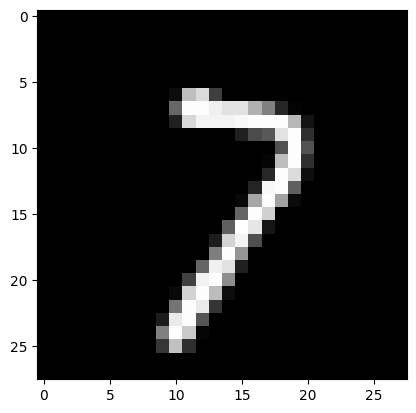

Prediction: 7


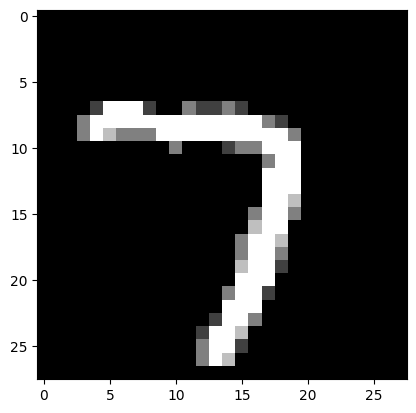

Prediction: 7


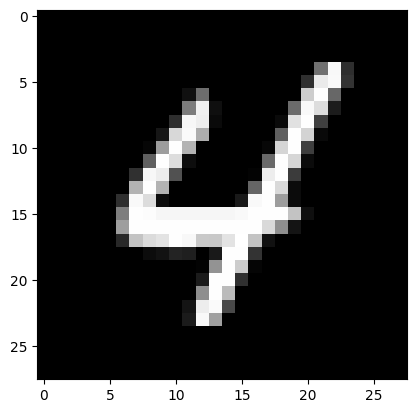

Prediction: 4


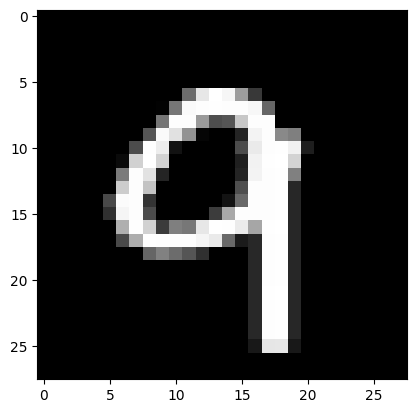

Prediction: 9


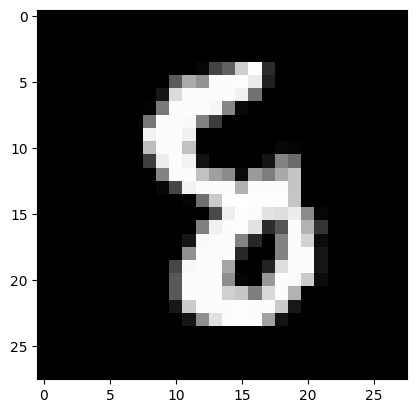

Prediction: 8


In [139]:
# visualizing some test.csv digits

X_test_for_visualization = pd.read_csv('dataset/test.csv').to_numpy()

for i in range(5):
    reshaped_image = X_test_for_visualization[i+40].reshape(28, 28)
    plt.imshow(reshaped_image, cmap='gray')
    plt.show()
    print(f"Prediction: {predictions[i+40]}")